In [1]:
from scipy.spatial.distance import cosine, euclidean
from sklearn.metrics.pairwise import cosine_similarity
import gensim
import pandas as pd
import pickle
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open("srt/stimulus_words.txt") as f:
    words = f.readlines()
    
words = map(lambda x: x.rstrip(), words)

In [3]:
with open('results/w_vectors.pcl', 'rb') as f:
    wvectors = pickle.load(f)

In [4]:
def get_nearest_neighbours(weights, topn=10, metric='cosin', vectors=wvectors, words=words):
    weights = weights.reshape(1,-1)
    if metric == 'cosin':
        dist = map(lambda x: cosine_similarity(weights, x.reshape(1, -1))[0,0], wvectors)
        data = zip(words, dist)
        data = list(set(data))
        data.sort(key=lambda x:-x[1])

        return data[:topn]

In [5]:
def get_voxel_result(x, y, z, weights, mask, topn=10, return_data=False):
    print "Correlation score: ", mask[x,y,z]
    
    print "The most similar words are: "

    data = get_nearest_neighbours(weights[x,y,z], topn=topn)
    for word, similarity in data:
    #model.most_similar(positive=[weights[x, y, z]], topn=topn, restrict_vocab=restr_voc):
        print "{}\t\t\t\t{}".format(word, round(similarity,3))
        
    imshow(mask[:,:, z], cmap='hot')
    scatter([y], [x])
    show()
    
    if return_data:
        return data

In [6]:
def get_weights_and_correlations(sub):
    try:
        weights = np.load('results/sub{}/weights_reshaped.npy'.format(sub))
        
        for filename in os.listdir('results/sub{}/'.format(sub)):
            if filename.startswith('sub{}_alph'.format(sub)):
                mask = np.load('results/sub{}/'.format(sub) + filename)
                mask = np.nan_to_num(mask)
                return weights, mask
        
        print "sorry, there is no suitable data"
    except Exception as e:
        print e
        print "sorry, there is no suitable data"

In [24]:
weights, mask = get_weights_and_correlations(9)

Correlation score:  0.177260365942
The most similar words are: 
menschen				0.456
ja				0.447
einfach				0.442
eben				0.438
halt				0.437
wirklich				0.436
arm				0.434
solltest				0.427
also				0.427
wirst				0.426
reinfallen				0.425
dumm				0.424
eigentlich				0.422
sies				0.421
tust				0.42
aber				0.413
lauf				0.412
geld				0.412
jawohl				0.411
immer				0.411


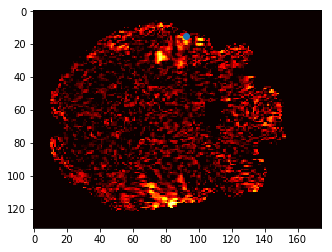

In [25]:
data1 = get_voxel_result(15, 92, 15, weights, mask, 
                         topn=20, return_data=True)

In [26]:
weights, mask = get_weights_and_correlations(3)

Correlation score:  0.575156066258
The most similar words are: 
ja				0.661
wirst				0.657
warst				0.652
aber				0.648
waerst				0.648
wurdest				0.647
redest				0.646
tust				0.646
solltest				0.646
wuerdest				0.644
du				0.637
eigentlich				0.636
hattest				0.633
und				0.632
wirklich				0.63
jawohl				0.627
gesagt				0.626
magst				0.626
koenntest				0.625
erzaehl				0.625


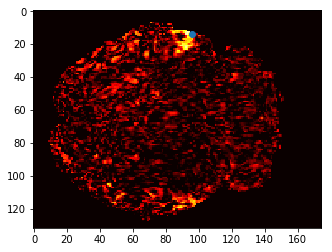

In [27]:
data2 = get_voxel_result(14, 96, 15, weights, mask, 
                         topn=20, return_data=True)

In [28]:
set1= set([d[0] for d in data1])
set2= set(d[0] for d in data2)

In [29]:
set12 = set1.intersection(set2)

In [30]:
weights, mask = get_weights_and_correlations(15)

Correlation score:  0.173716945636
The most similar words are: 
eben				0.468
immer				0.447
wirklich				0.444
einfach				0.444
frau				0.441
gar				0.436
denken				0.434
aber				0.43
und				0.427
leute				0.426
natuerlich				0.425
tun				0.422
ja				0.422
vieles				0.42
sachen				0.417
bloeder				0.416
reinfallen				0.415
irgendwie				0.414
anschauten				0.414
werbung				0.413


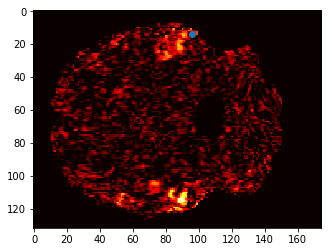

In [31]:
data3 = get_voxel_result(14, 96, 15, weights, mask, 
                         topn=20, return_data=True)

In [32]:
set3 = set([d[0] for d in data3])

In [33]:
set1.intersection(set3)

{'aber', 'eben', 'einfach', 'immer', 'ja', 'reinfallen', 'wirklich'}

In [34]:
weights, mask = get_weights_and_correlations(12)

In [48]:
np.unravel_index(np.argmax(mask), mask.shape)

(116, 92, 19)

Correlation score:  0.542298881624
The most similar words are: 
und				0.663
reinfallen				0.656
selbst				0.635
denn				0.63
doch				0.626
aber				0.622
weil				0.622
da				0.618
kriegten				0.613
also				0.611
wirst				0.607
pennen				0.607
redest				0.606
schliesslich				0.603
glotzen				0.601
teenager				0.6
hier				0.595
jawohl				0.595
die				0.59
narren				0.588


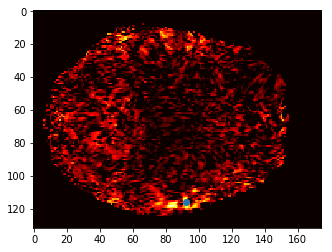

In [49]:
data4 = get_voxel_result(116, 92, 19, weights, mask, 
                         topn=20, return_data=True)

Correlation score:  0.285575286564
The most similar words are: 
scheisse				0.534
halt				0.527
schaffst				0.509
echt				0.506
machst				0.503
tust				0.502
einfach				0.501
hey				0.498
haettest				0.496
sag				0.494
krieg				0.494
lasst				0.493
ja				0.491
ok				0.49
seid				0.489
nimmst				0.485
kriegen				0.485
verdammt				0.484
hast				0.483
magst				0.482


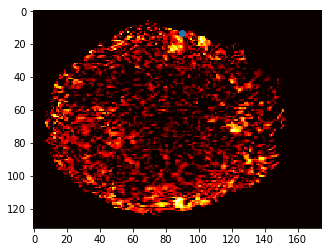

In [46]:
data4 = get_voxel_result(13, 90, 15, weights, mask, 
                         topn=20, return_data=True)

In [43]:
set4 = set([d[0] for d in data4])

In [44]:
set4.intersection(set12)

{'ja', 'tust'}